In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 12})
from diffpy.pdfgetx.version import __version__

# some convenience imports
from diffpy.pdfgetx.pdfconfig import PDFConfig, loadPDFConfig
from diffpy.pdfgetx.pdfgetter import PDFGetter
from diffpy.pdfgetx.transformation import Transformation
from diffpy.pdfgetx.functs import loaddata, findfiles

# TODO - replace with  `loadData = loaddata` for version 3.0
from diffpy.pdfgetx.functs import loadData

In [21]:

file = 'LaB6_0p4mm_011_av10_monitor.xye'
bkgfile = '0p4mm_capillary_018_av17_monitor.xye'

q,i = np.loadtxt(file,unpack = True,usecols = (0,1))


In [4]:
help(PDFConfig)

Help on class PDFConfig in module diffpy.pdfgetx.pdfconfig:

class PDFConfig(builtins.object)
 |  PDFConfig(**kwargs)
 |  
 |  This class stores all configuration data needed for generating PDF.
 |  
 |  Configuration data processing:
 |  
 |  Inputs and Outputs:
 |  
 |  configfile   -- The last configuration file in a Windows .ini format
 |                  that was loaded.  ``None`` when no such file has
 |                  been read yet.
 |  configsection -- section of the `configfile` that was the last
 |                  loaded or ``None``.
 |  dataformat   -- format of input data files, by default 'twotheta'.
 |                  Supported formats:
 |                  'twotheta' - ASCII text file with 2 columns for
 |                      [twotheta, intensity]
 |                  'QA' - ASCII text file, the first column is Q in Angstroms
 |                  'Qnm' - ASCII text file, the first column is Q in nm
 |  inputfiles   -- powder diffraction data files to be processed
 |  i

In [5]:
help(PDFGetter)

Help on class PDFGetter in module diffpy.pdfgetx.pdfgetter:

class PDFGetter(builtins.object)
 |  PDFGetter(config=None)
 |  
 |  Functor for converting input intensity data to a PDF.
 |  
 |  Instance attributes:
 |  
 |  config           -- instance of PDFConfig or a dictionary
 |                      that contains all configuration variables
 |  inputfile        -- path to the input file used for (x, y) array.
 |                      Empty when (x, y) inputs were passed as arrays.
 |  transformations  -- list of Transform class instances.
 |  results          -- list of (x, y) tuples of input arrays and
 |                      intermediate results.
 |  
 |  Properties:
 |  
 |  iq, fq, sq, gr   -- retrieves the (x, y) tuple from the transformation
 |                      associated with the iq, fq, sq or gr outputtype
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, filename='', **kwargs)
 |      Process (x, y) to output arrays (xout, yout) - usually (r, g).
 |

In [29]:
config = PDFConfig(qmin = 0.7,qmax = 23,qmaxinst = 23.4, dataformat = 'twotheta', inputfiles = file, backgroundfile = bkgfile,
                  composition = 'LaB6', rpoly = 1.5, rmax = 50, outputtypes = 'sq,fq,gr',bgscale = 1, wavelength = 0.270793)
pdfcalc = PDFGetter(config = config)
pdfcalc(filename = file)
pdfcalc.fq

(array([ 0.70143606,  0.70413389,  0.70683172, ..., 22.99361357,
        22.9963114 , 22.99900923]),
 array([ 0.02604231,  0.02549715,  0.02417876, ..., -0.11758144,
        -0.13630587, -0.15125691]))

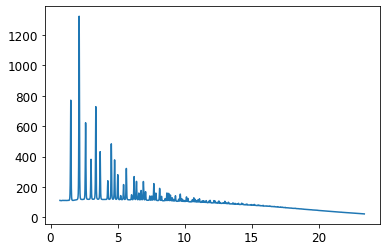

In [33]:
plt.plot(*pdfcalc.iq)

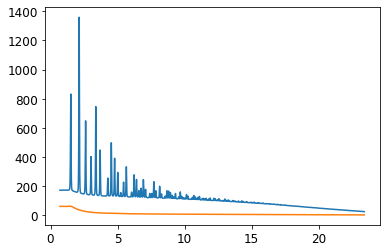

In [45]:
plt.plot(*pdfcalc.results[2])
plt.plot(pdfcalc.results[2][0],pdfcalc.results[2][1]-pdfcalc.iq[1])

In [53]:
qi = pdfcalc.iq[0]
qs,sq = pdfcalc.sq[0], pdfcalc.sq[1]
qf,fq = pdfcalc.fq[0], pdfcalc.fq[1]

In [58]:
print(qi)
print(qs)
print(qf)

[ 0.70143606  0.70413389  0.70683172 ... 23.39289256 23.39559039
 23.39828822]
[ 0.70143606  0.70413389  0.70683172 ... 22.99361357 22.9963114
 22.99900923]
[ 0.70143606  0.70413389  0.70683172 ... 22.99361357 22.9963114
 22.99900923]


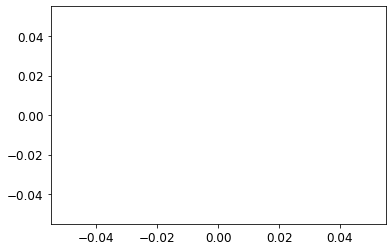

In [5]:
a = []
fig,ax = plt.subplots()
for n in range(5):
    a.append(n)
    ax.cla()
    ax.plot(a,a)
    plt.show(block=False)
    plt.pause(1)